In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
df=pd.read_csv("C:/Users/Harpreet/CompleteDataset.csv")


C:\Users\Harpreet\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.columns

Index([u'Unnamed: 0', u'Name', u'Age', u'Photo', u'Nationality', u'Flag',
       u'Overall', u'Potential', u'Club', u'Club Logo', u'Value', u'Wage',
       u'Special', u'Acceleration', u'Aggression', u'Agility', u'Balance',
       u'Ball control', u'Composure', u'Crossing', u'Curve', u'Dribbling',
       u'Finishing', u'Free kick accuracy', u'GK diving', u'GK handling',
       u'GK kicking', u'GK positioning', u'GK reflexes', u'Heading accuracy',
       u'Interceptions', u'Jumping', u'Long passing', u'Long shots',
       u'Marking', u'Penalties', u'Positioning', u'Reactions',
       u'Short passing', u'Shot power', u'Sliding tackle', u'Sprint speed',
       u'Stamina', u'Standing tackle', u'Strength', u'Vision', u'Volleys',
       u'CAM', u'CB', u'CDM', u'CF', u'CM', u'ID', u'LAM', u'LB', u'LCB',
       u'LCM', u'LDM', u'LF', u'LM', u'LS', u'LW', u'LWB',
       u'Preferred Positions', u'RAM', u'RB', u'RCB', u'RCM', u'RDM', u'RF',
       u'RM', u'RS', u'RW', u'RWB', u'ST'],
      dtype=

In [7]:
df = df[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Preferred Positions']]
df.head(11)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,GK
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,ST
6,De Gea,26,Spain,90,92,Manchester United,€64.5M,GK
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,LW
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,CDM CM
9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,ST


In [6]:
df['Remaining Potential'] = df['Potential'] - df['Overall']


df['Preferred Position'] = df['Preferred Positions'].str.split().str[0]


df.head(11)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RCM,RDM,RF,RM,RS,RW,RWB,ST,Remaining Potential,Preferred Position
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,0,ST
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,0,RW
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,2,LW
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,0,ST
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,GK
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0,0,ST
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,GK
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0,1,LW
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0,0,CDM
9,9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0,0,ST


In [13]:
def get_best_squad(position):
    df_copy = df.copy()
    store = []
    for i in position:
        store.append([i,df_copy.loc[[df_copy[df_copy['Preferred Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False), df_copy[df_copy['Preferred Position'] == i]['Overall'].max()])
        df_copy.drop(df_copy[df_copy['Preferred Position'] == i]['Overall'].idxmax(), inplace = True)
    return pd.DataFrame(np.array(store).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)

squad_433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
print (':best players 4-3-3')
print (get_best_squad(squad_433))

:best players
Position              Player Overall
      GK            M. Neuer      92
      LB             Marcelo      87
      CB        Sergio Ramos      90
      CB        G. Chiellini      89
      RB            Carvajal      84
      LM          C. Eriksen      87
     CDM            T. Kroos      90
      RM        K. De Bruyne      89
      LW              Neymar      92
      ST   Cristiano Ronaldo      94
      RW            L. Messi      93


In [14]:
squad_352 = ['GK', 'LWB', 'CB', 'RWB', 'LM', 'CDM', 'CAM', 'CM', 'RM', 'LW', 'RW']
print (':best player 3-5-2')
print (get_best_squad(squad_352))

:best player 3-5-2
Position         Player Overall
      GK       M. Neuer      92
     LWB        D. Rose      82
      CB   Sergio Ramos      90
     RWB      K. Walker      83
      LM     C. Eriksen      87
     CDM       T. Kroos      90
     CAM       Coutinho      86
      CM       N. Kanté      87
      RM   K. De Bruyne      89
      LW         Neymar      92
      RW       L. Messi      93


Text(0.5,1,'Average Rating by Age')

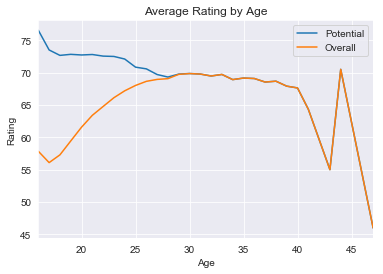

In [15]:
df_p = df.groupby(['Age'])['Potential'].mean()
df_o = df.groupby(['Age'])['Overall'].mean()

df_summary = pd.concat([df_p, df_o], axis=1)

ax = df_summary.plot()
ax.set_ylabel('Rating')
ax.set_title('Average Rating by Age')

In [5]:
youngest = df.sort_values('Age')[['Name', 'Age', 'Club', 'Nationality']].head(11)
print(youngest)
counts = df.groupby(['Age','Name']).count()
print counts
df['ids_counted']= np.round(df['Age'])
categories_dict = { 15 : 'Between 10 and 20',
                    16 : 'Between 10 and 20',
                    17 : 'Between 10 and 20',
                    18 : 'Between 10 and 20',
                    19 : 'Between 10 and 20',
                    20 : 'Between 10 and 20',
                    21 : 'Between 21 and 30',
                    22 : 'Between 21 and 30',
                    90 : 'Between 81 and 90',} 



                Name  Age                 Club  Nationality
15837      J. Romero   16     Atlético Tucumán    Argentina
17667        J. Hove   16              Sogndal       Norway
15571   Javi Vázquez   16     Sevilla Atlético        Spain
10556      K. Pierie   16        SC Heerenveen  Netherlands
17025      L. Pintor   16    Stade Brestois 29       France
17055     V. Barbero   16  Belgrano de Córdoba    Argentina
16116      M. Sprang   16          FSV Zwickau      Germany
13733     E. Vignato   16        Chievo Verona        Italy
15063   G. McEachran   16              Chelsea      England
15119  L. Geertruida   16            Feyenoord  Netherlands
15968      E. Håland   16             Molde FK       Norway
                   Unnamed: 0  Photo  Nationality  Flag  Overall  Potential  \
Age Name                                                                      
16  A. Gomes                1      1            1     1        1          1   
    E. Håland               1      1       

                Name  Age                 Club  Nationality
15837      J. Romero   16     Atlético Tucumán    Argentina
17667        J. Hove   16              Sogndal       Norway
15571   Javi Vázquez   16     Sevilla Atlético        Spain
10556      K. Pierie   16        SC Heerenveen  Netherlands
17025      L. Pintor   16    Stade Brestois 29       France
17055     V. Barbero   16  Belgrano de Córdoba    Argentina
16116      M. Sprang   16          FSV Zwickau      Germany
13733     E. Vignato   16        Chievo Verona        Italy
15063   G. McEachran   16              Chelsea      England
15119  L. Geertruida   16            Feyenoord  Netherlands
15968      E. Håland   16             Molde FK       Norway


Text(0.5,1,'youngest player by Age')

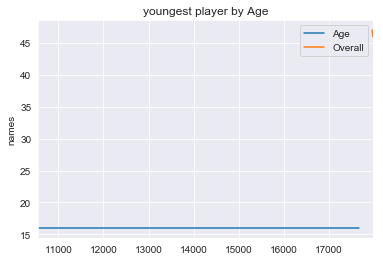

In [30]:
youngest = df.sort_values('Age')[['Name', 'Age', 'Club', 'Nationality']].head(11)
print(youngest)
names= df.sort_values('Overall')[['Name','Overall', 'Club', 'Nationality']].head(11)
graph = pd.concat([youngest, names], axis=1)
ax =graph.plot()
ax.set_ylabel('names')
ax.set_title('youngest player by Age')


In [18]:
players.groupby("Nationality").Name.count()

Nationality
Afghanistan                3
Albania                   35
Algeria                   57
Angola                    15
Antigua & Barbuda          5
Argentina                965
Armenia                   14
Australia                224
Austria                  266
Azerbaijan                 7
Barbados                   1
Belarus                    9
Belgium                  271
Belize                     1
Benin                     14
Bermuda                    4
Bolivia                    2
Bosnia Herzegovina        55
Brazil                   809
Brunei Darussalam          1
Bulgaria                  20
Burkina Faso              14
Burundi                    1
Cameroon                  80
Canada                    50
Cape Verde                22
Central African Rep.       4
Chad                       2
Chile                    368
China PR                   4
                        ... 
Somalia                    1
South Africa              66
Spain                   1019
Sr